In [ ]:
                                          EXPLORATORY DATA ANALYSIS ON A DATASET ASSIGNMENT 

In [18]:
import pandas as pd 
df = pd.read_csv("cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [15]:
#1.data cleaning and preparation

import pandas as pd 
df = pd.read_csv("cardiotocographic.csv")
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [22]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [29]:
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [24]:
print("Dataset shape:")
print(df.shape)

Dataset shape:
(2126, 14)


In [25]:
print("Data Types:")
print(df.dtypes)

Data Types:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [36]:
# Drop rows with missing values
df = df.dropna()

# Drop columns with missing values
df = df.dropna(axis=1)


In [42]:
# Detect & Treat Outliers 
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]




LB: 0 outliers
AC: 0 outliers
FM: 0 outliers
UC: 0 outliers
DL: 104 outliers
DS: 0 outliers
DP: 0 outliers
ASTV: 0 outliers
MSTV: 6 outliers
ALTV: 49 outliers
MLTV: 0 outliers
Width: 21 outliers
Tendency: 81 outliers
NSP: 0 outliers


In [21]:
#statistical summary
print("Summary Statistics:")
(df.describe())


Summary Statistics:


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [ ]:
print("Mean:", df['Total Sales Value'].mean()) #average
print("Median:", df['Total Sales Value'].median())#middle value
print("Mode:", df['Total Sales Value'].mode()[0])#repeated value
print("Standard Deviation:", df['Total Sales Value'].std())#standard deviation


In [51]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]   
    std_val = df[col].std()
    var_val = df[col].var()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    print(f"\nColumn: {col}")
    print(f" Mean: {mean_val}")
    print(f" Median: {median_val}")
    print(f" Mode: {mode_val}")
    print(f" Standard Deviation: {std_val}")
    print(f" Variance: {var_val}")
    print(f" IQR: {IQR}")



Column: LB
 Mean: 131.81509303122445
 Median: 132.0
 Mode: 122.0
 Standard Deviation: 10.412203156120622
 Variance: 108.41397456432826
 IQR: 17.37040935582303

Column: AC
 Mean: 0.004050572896774193
 Median: 0.003504673
 Mode: 0.0
 Standard Deviation: 0.0037214930198887558
 Variance: 1.3849510297080732e-05
 IQR: 0.0064987855

Column: FM
 Mean: 0.0
 Median: 0.0
 Mode: 0.0
 Standard Deviation: 0.0
 Variance: 0.0
 IQR: 0.0

Column: UC
 Mean: 0.005202140058064516
 Median: 0.005240175
 Mode: 0.0
 Standard Deviation: 0.0024867232786992596
 Variance: 6.183792664824795e-06
 IQR: 0.0034040794999999997

Column: DL
 Mean: 3.566299338104803e-07
 Median: 0.0
 Mode: 0.0
 Standard Deviation: 5.268139232255199e-06
 Variance: 2.7753290970426397e-11
 IQR: 0.0

Column: DS
 Mean: 0.0
 Median: 0.0
 Mode: 0.0
 Standard Deviation: 0.0
 Variance: 0.0
 IQR: 0.0

Column: DP
 Mean: 0.0
 Median: 0.0
 Mode: 0.0
 Standard Deviation: 0.0
 Variance: 0.0
 IQR: 0.0

Column: ASTV
 Mean: 38.609706187458514
 Median: 36.0

In [52]:
# Calculate skewness for all numeric columns
for col in df.select_dtypes(include=[np.number]).columns:
    skew_val = df[col].skew()
    print(f"{col}: Skewness = {skew_val:.2f}")
    if skew_val > 1:
        print(" → Highly Right Skewed")
    elif skew_val > 0.5:
        print(" → Moderately Right Skewed")
    elif skew_val < -1:
        print(" → Highly Left Skewed")
    elif skew_val < -0.5:
        print(" → Moderately Left Skewed")
    else:
        print(" → Approximately Symmetric")


LB: Skewness = -0.08
 → Approximately Symmetric
AC: Skewness = 0.61
 → Moderately Right Skewed
FM: Skewness = 0.00
 → Approximately Symmetric
UC: Skewness = -0.11
 → Approximately Symmetric
DL: Skewness = 3.37
 → Highly Right Skewed
DS: Skewness = 0.00
 → Approximately Symmetric
DP: Skewness = 0.00
 → Approximately Symmetric
ASTV: Skewness = 0.56
 → Moderately Right Skewed
MSTV: Skewness = 0.34
 → Approximately Symmetric
ALTV: Skewness = 2.59
 → Highly Right Skewed
MLTV: Skewness = -0.18
 → Approximately Symmetric
Width: Skewness = 0.88
 → Moderately Right Skewed
Tendency: Skewness = 0.00
 → Approximately Symmetric
NSP: Skewness = 0.00
 → Approximately Symmetric


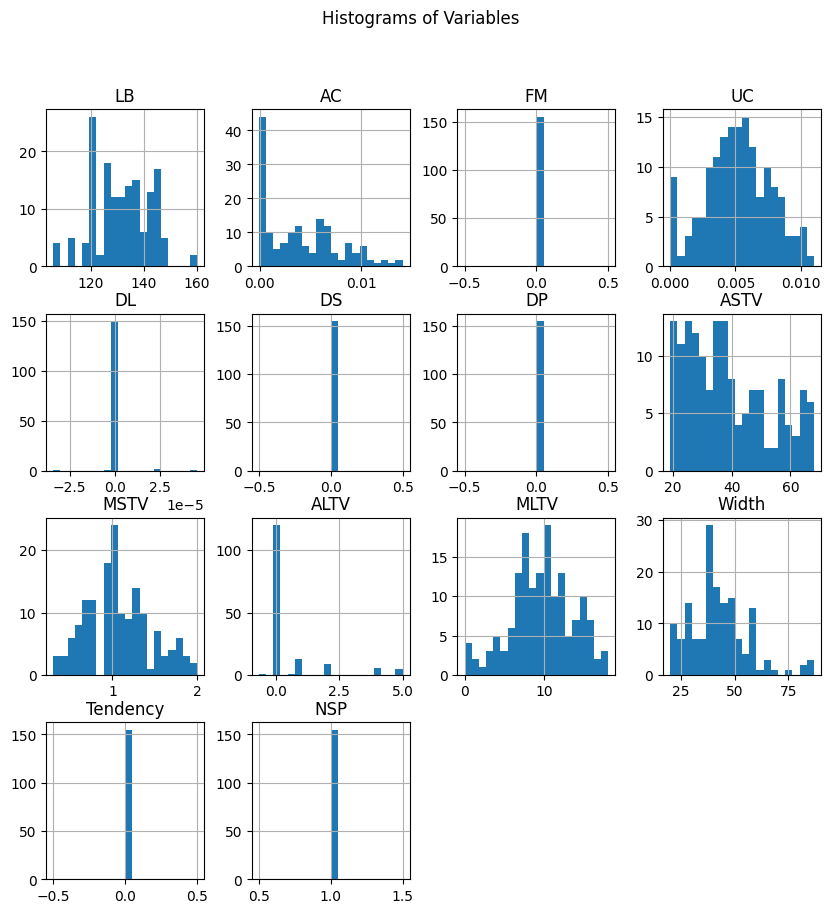

In [58]:
# data visualization
# Histograms
df.hist(figsize=(10, 10), bins=20)
plt.suptitle("Histograms of Variables")
plt.show()


<Figure size 600x300 with 0 Axes>

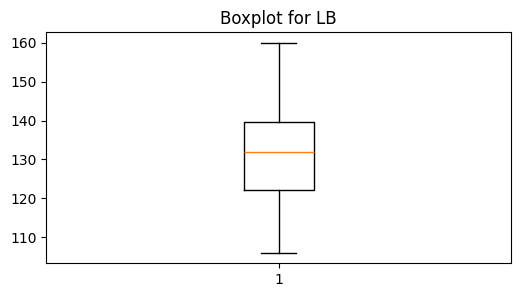

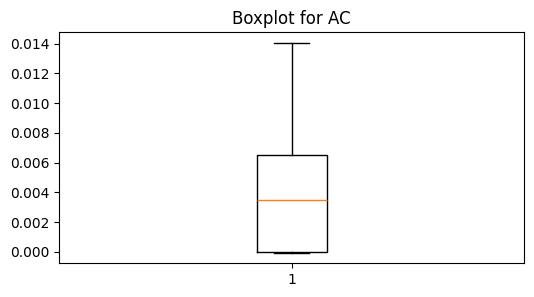

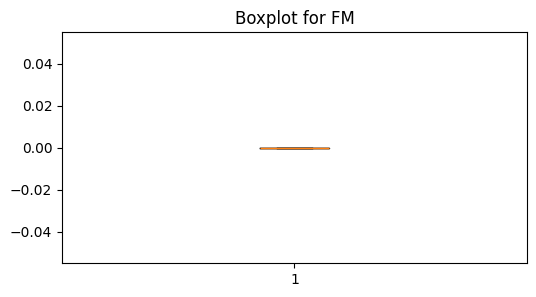

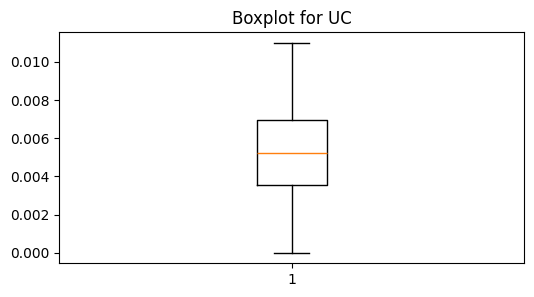

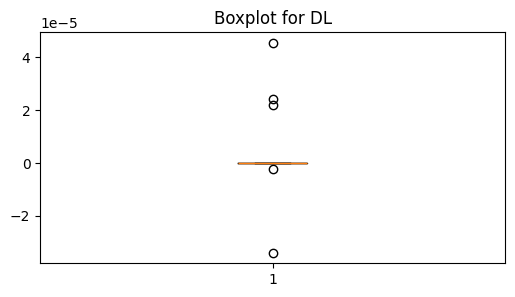

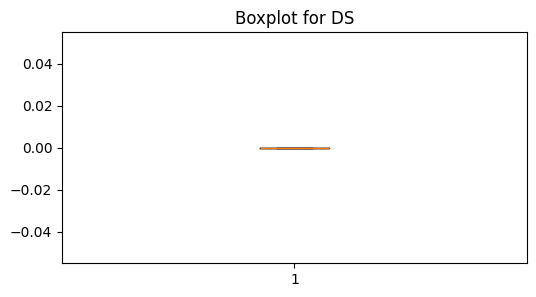

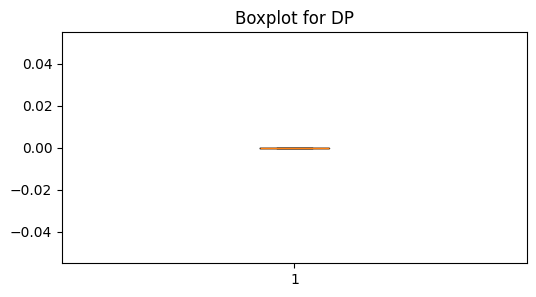

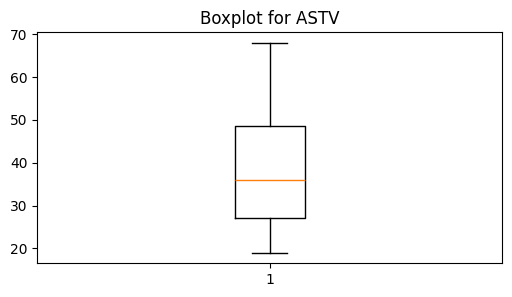

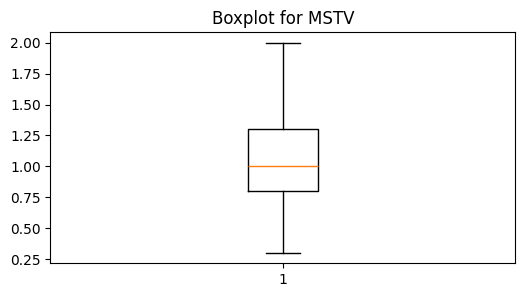

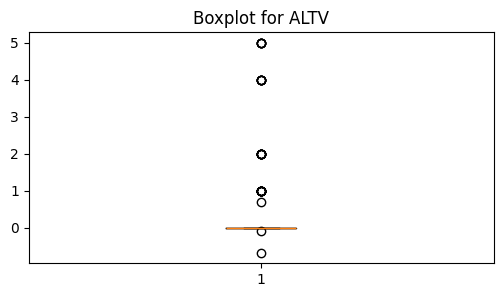

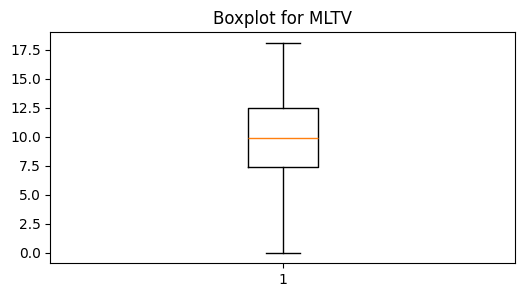

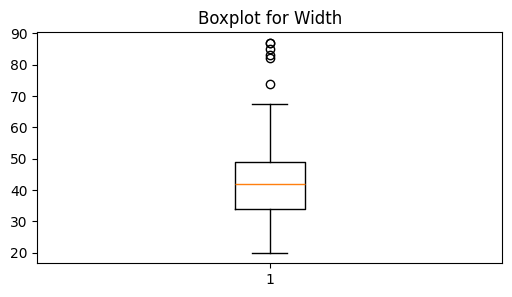

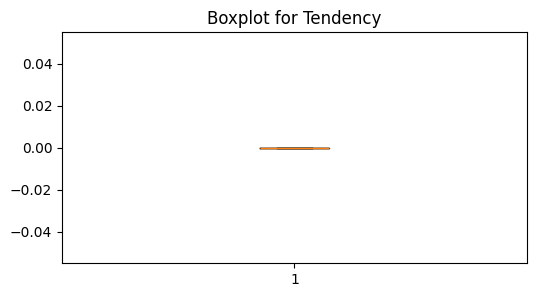

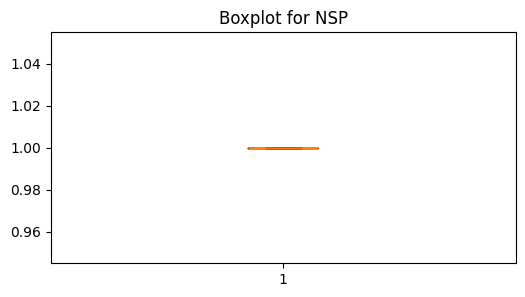

In [45]:

import matplotlib.pyplot as plt

for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6,3))
    plt.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("cardiotocographic.csv")
print(df.head())
 

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [39]:
print(df.columns)


Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')


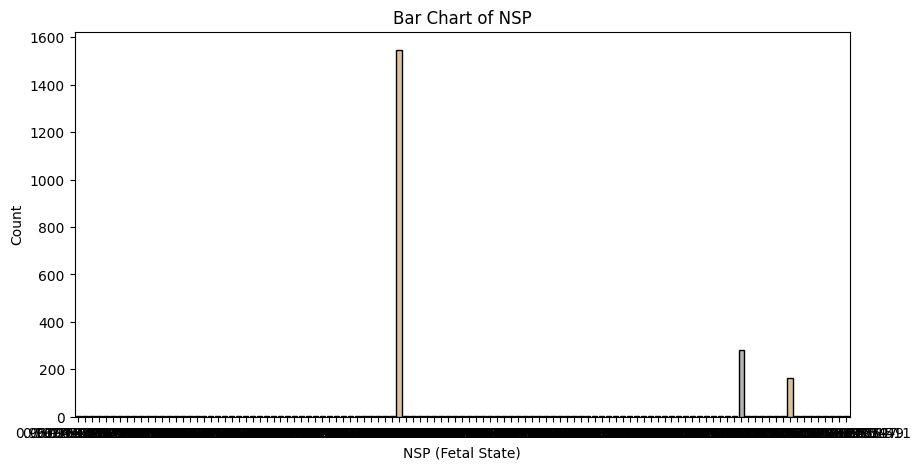

<Axes: xlabel='NSP', ylabel='count'>

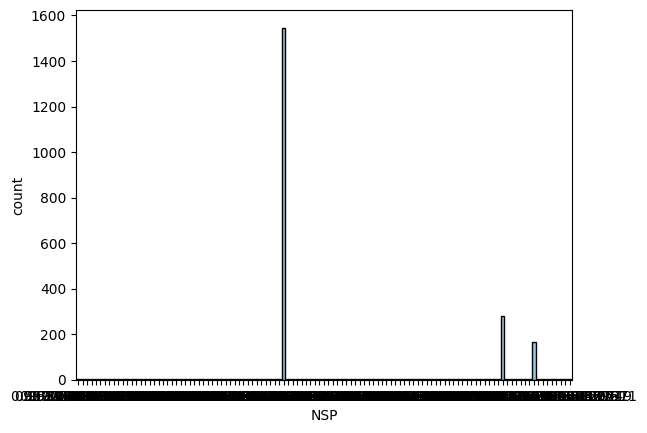

In [64]:
# Bar chart
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="NSP", palette="Set2", edgecolor="black")
plt.title("Bar Chart of NSP")
plt.xlabel("NSP (Fetal State)")
plt.ylabel("Count")
plt.show()
sns.countplot(data=df, x="NSP", color="skyblue", edgecolor="black")




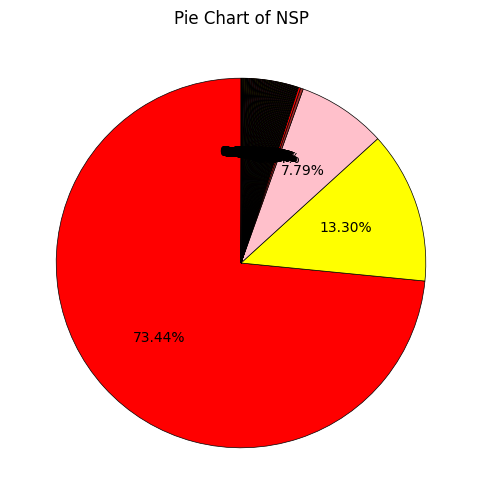

In [65]:
# Pie chart
category_counts = df["NSP"].value_counts()
z =["red","yellow","pink","brown"]
plt.figure(figsize=(6,6))
plt.pie(category_counts, autopct='%1.2f%%', startangle=90, colors=z, wedgeprops={"edgecolor": "black", "linewidth": 0.5})
plt.title("Pie Chart of NSP")
plt.show()

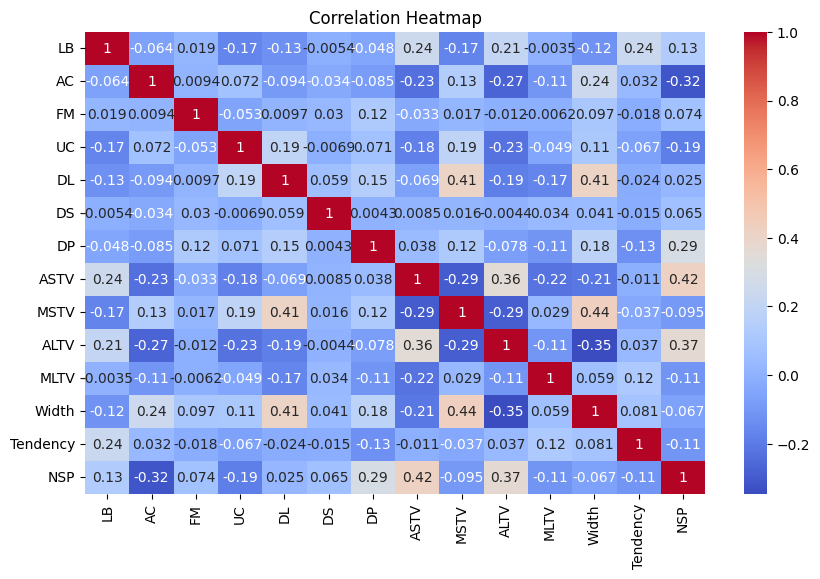

In [68]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

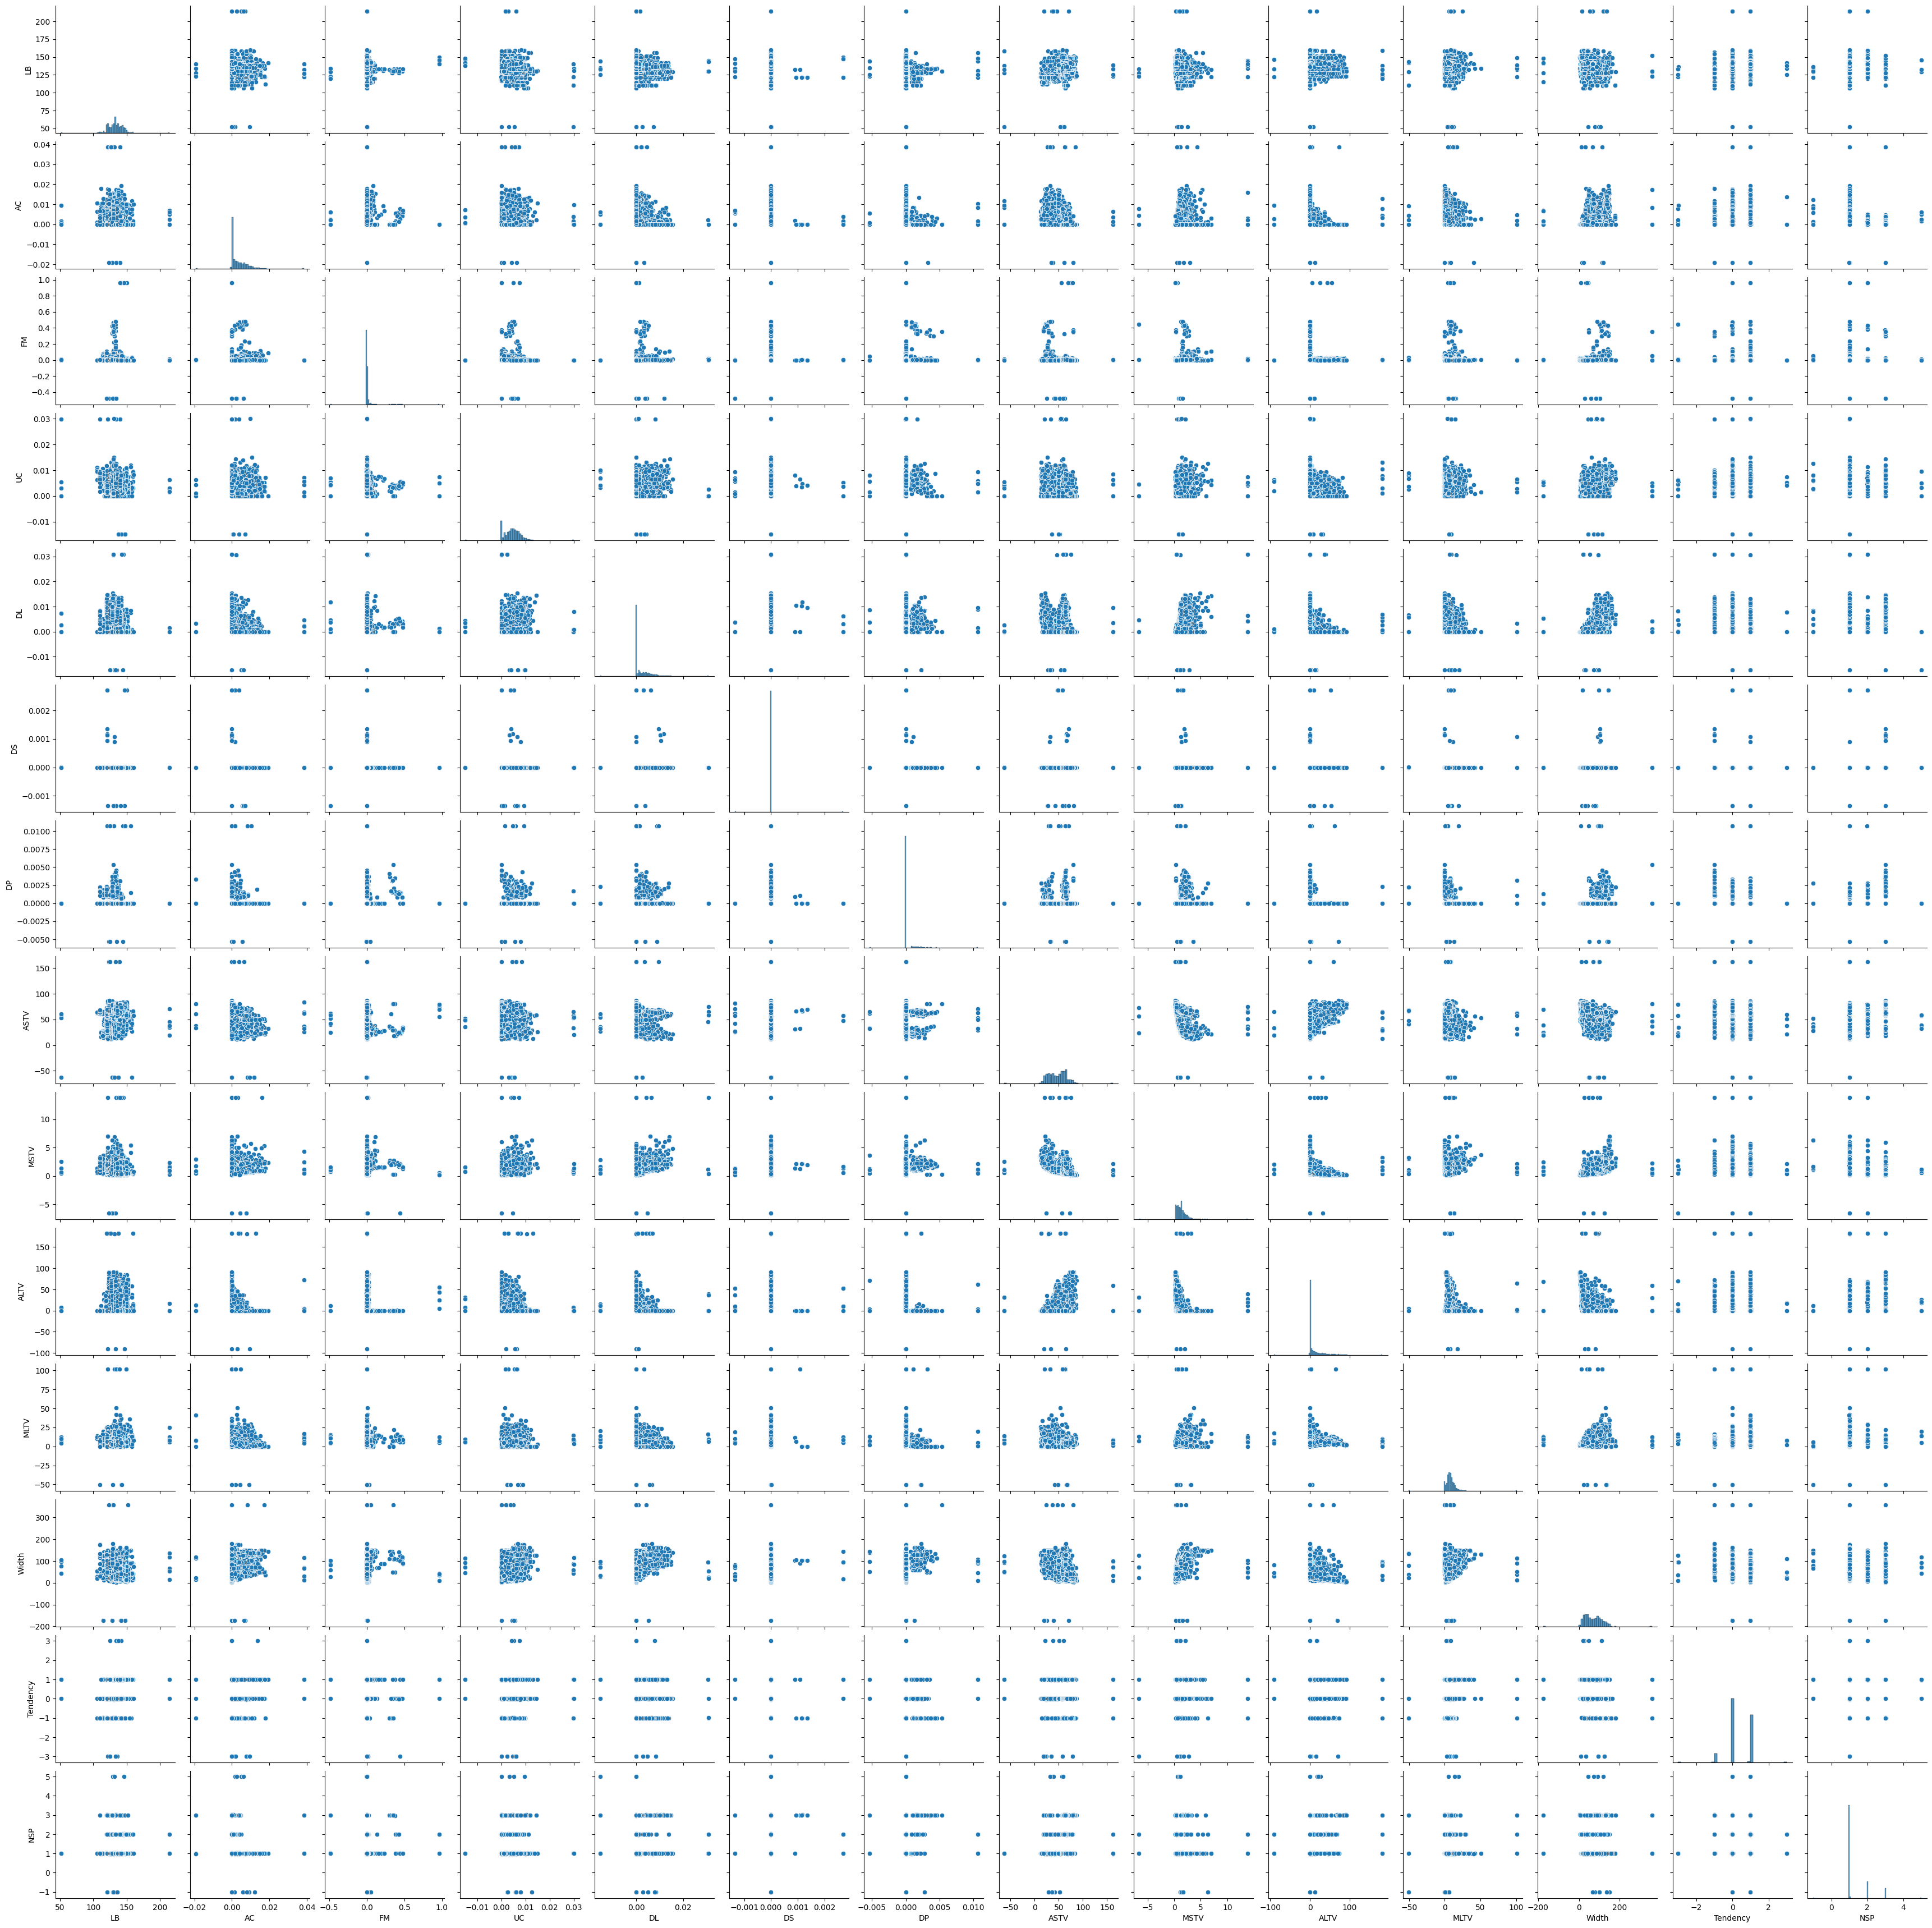

In [70]:
#pair plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()


In [71]:
#pattern recognition and insights
if "LB" in df.columns:
    corr_with_LB = df.corr()["LB"].sort_values(ascending=False)
    print("\nCorrelation of LB with other variables:")
    print(corr_with_LB)


Correlation of LB with other variables:
LB          1.000000
ASTV        0.242625
Tendency    0.236864
ALTV        0.210728
NSP         0.131843
FM          0.018777
MLTV       -0.003457
DS         -0.005438
DP         -0.047724
AC         -0.063830
Width      -0.118425
DL         -0.126959
UC         -0.166570
MSTV       -0.170473
Name: LB, dtype: float64


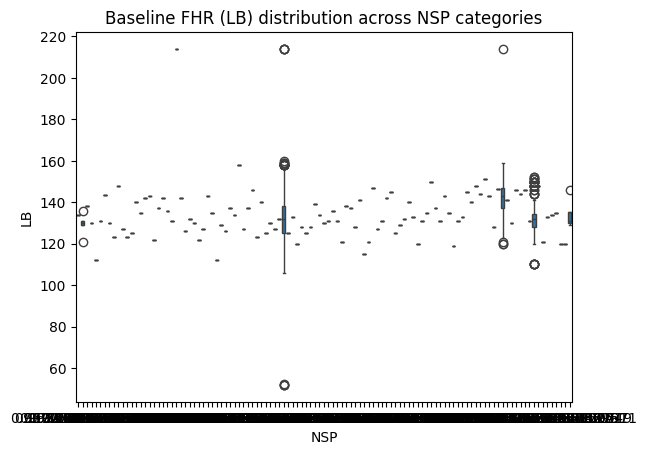

In [73]:
sns.boxplot(data=df, x="NSP", y="LB")
plt.title("Baseline FHR (LB) distribution across NSP categories")
plt.show()


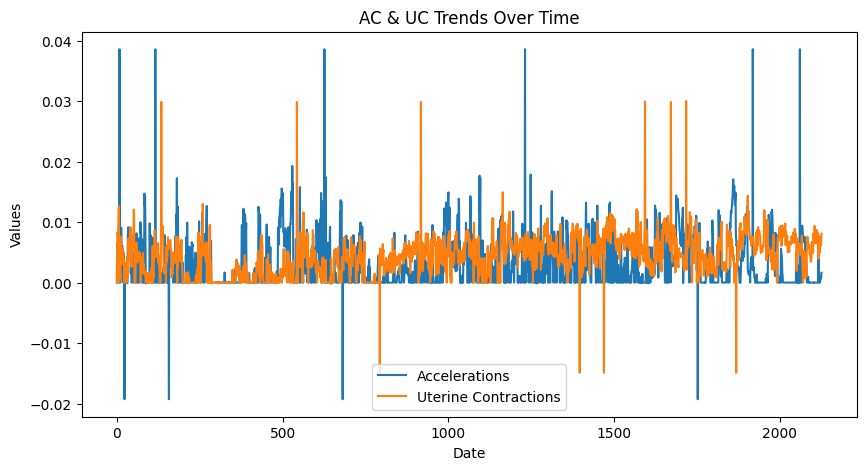

In [78]:
# Trend of multiple variables
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df.index, y="AC", label="Accelerations")
sns.lineplot(data=df, x=df.index, y="UC", label="Uterine Contractions")
plt.title("AC & UC Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()


In [72]:

# 7. Conclusion (print insights manually in Notebook)
print("\n--- Conclusion Section ---")
print("Summarize key patterns, correlations, and insights here.")
print("Discuss how findings could impact decision making.")



--- Conclusion Section ---
Summarize key patterns, correlations, and insights here.
Discuss how findings could impact decision making.


In [ ]:
#conclusion
The EDA shows that most cases in the dataset are Normal, while fewer are Suspect and Pathological, indicating class imbalance.
Features such as LB (Baseline FHR), AC (Accelerations), and UC (Uterine Contractions) vary across Overall, the dataset provides
useful patterns that can help in developing predictive models for detecting abnormal fetal health conditions.